In [8]:
from skimage import io
%matplotlib inline
import matplotlib
from matplotlib import (pyplot as plt, animation, colors,
                        ticker, path, patches, patheffects)

In [46]:
diffraction = io.imread('./fastline8_seed_00729.tif')

In [49]:
np.max(diffraction.reshape(-1))

32568

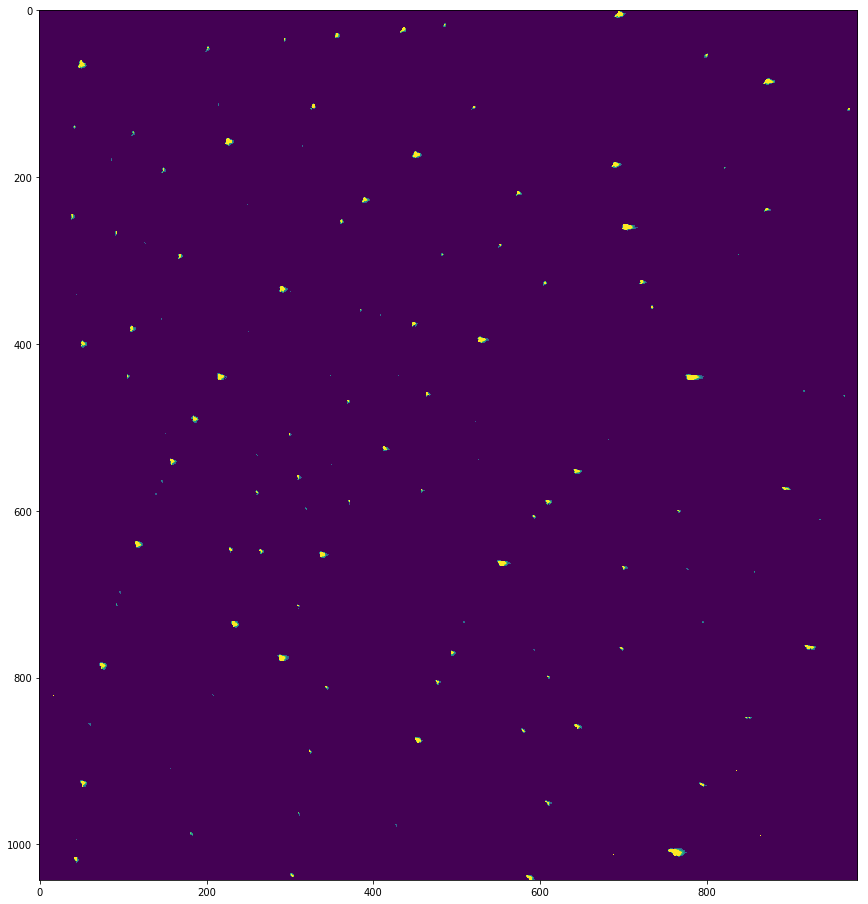

In [56]:
fig=plt.figure(figsize=(18, 16))
diffraction[diffraction>20000] = np.min(diffraction)
diffraction[diffraction<80] = np.min(diffraction)
plt.imshow(diffraction, clim=[0,300])

/Users/joshuaagar/anaconda/lib/python3.6/site-packages/skimage/segmentation/_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
/Users/joshuaagar/anaconda/lib/python3.6/site-packages/skimage/segmentation/_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


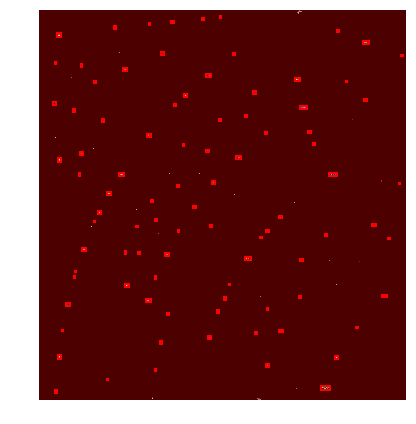

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = np.invert(formatted)

# apply threshold
#thresh = threshold_otsu(image)
bw = closing(image > 80, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 5:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [72]:
regionprops(label_image)[0].bbox

(16, 484, 20, 487)

In [57]:
formatted = (diffraction * 255 / 300).astype('uint8')

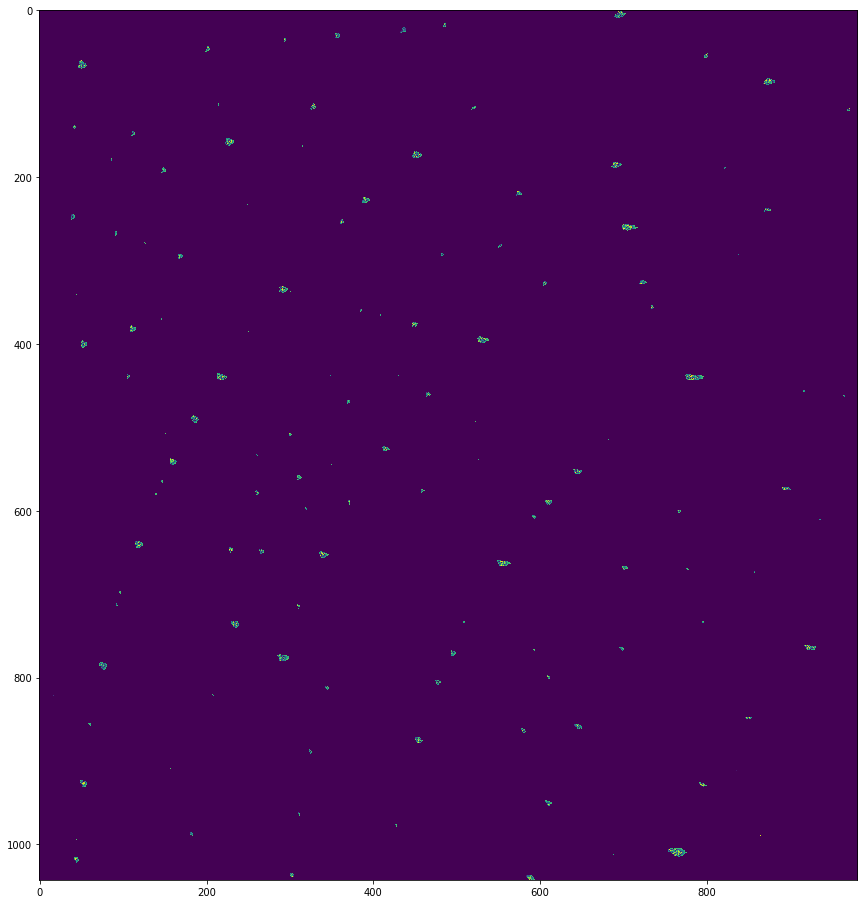

In [61]:
fig=plt.figure(figsize=(18, 16))
plt.imshow(np.invert(formatted))

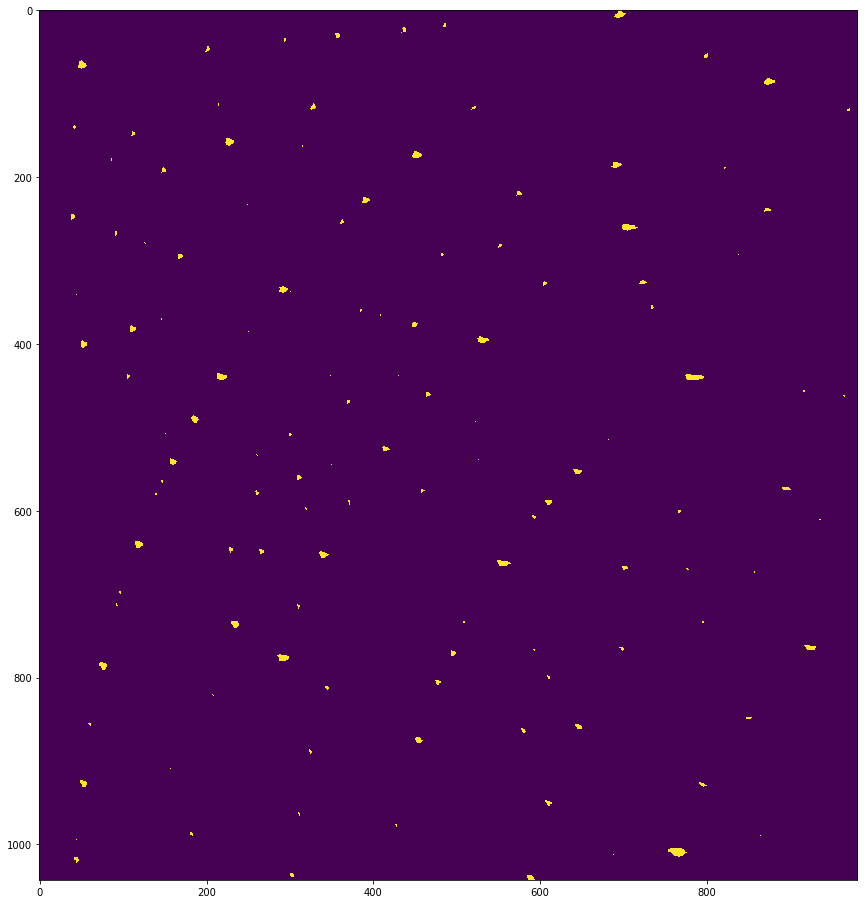

In [65]:
fig=plt.figure(figsize=(18, 16))
plt.imshow(bw)